#**End-to-End Machine Learning Project**
In this example we will see an end-to-end Machine Learning project.
We will be using the California Housing Prices dataset from the StatLib repository based on the 1990 California census.

##Popular Data Sources  
* Popular open data repositories
  * UC Irvine Machine Learning Repository
  * Kaggle datasets
  * Amazon’s AWS datasets
* Meta portals (they list open data repositories)
  * Data Portals
  * OpenDataMonitor
  * Quandl
* Other pages listing many popular open data repositories
  * Wikipedia’s list of Machine Learning datasets
  * Quora.com
  * The datasets subreddit
  

##Framing The Problem
The project is to build a model to **predict a district's median housing price** that will be used as input to another Machine Learning project.
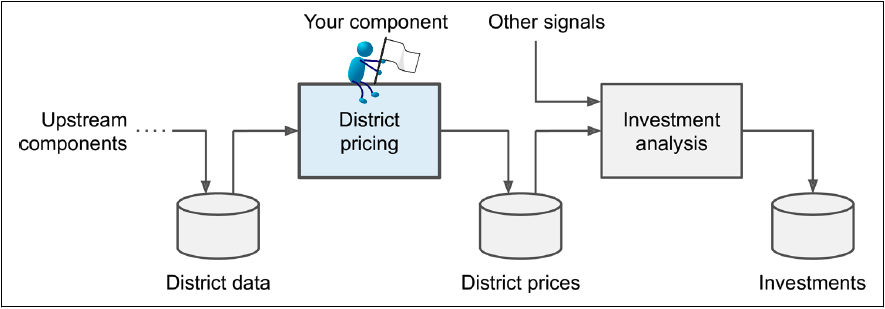

The questions to ask:  
* Is it supervised, unsupervised, or Reinforcement
Learning?
* Is it a classification task, a regression task, or something else?
* Should we use batch learning or online learning techniques?  
Answers:
* It is clearly a typical **supervised learning* task (because we have the labels of the training examples). The instances of the data come with th expected output ==> District's median housing price.
* It is a typical **regression task**, because we are asked to predict a value. More specifically, this is a **multiple regression problem**, since the system will use multiple features to make a prediction (it will use the district’s population, the median income, etc.).
* It is also a **univariate regression** problem, since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a multivariate regression problem. 
* There is no continuous flow of data coming into the system, there is
no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so **plain batch learning** should do just fine.

##Selecting a Performance Measure. 
A typical performance measuer for regression problems is the **Root Mean Square Error (RMSE)**  
$ RMSE(X,h) = \sqrt{\frac{1}{m}\sum \limits _{i=1} ^{m}(h(x^{(i)})-y^{(i)})^{2}}$  
Notation:  
* *m* is the number of instances in the dataset 
* $x^{(i)}$ is a vector of all the feature values (excluding the label) of the $i^{th}$ instancein the dataset
*  $y^{(i)}$ is the label of the desired output value for that instance  

Example:  
If the first district in the dataset is located at longitude –118.29,
latitude 33.91, and it has 1,416 inhabitants with a median income of USD 38,372, and the median house value is USD 156,400. Then  
$x^{(1)} = \left( \begin{array}{cc} -118.29 \\ 33.91 \\ 1,416\\ 38,372 \end{array}\right) $  
$y^{(1)} = 156,400$  

##Getting the Data  
We will get the data from https://github.com/ageron/handson-ml2 

In [31]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DATA_PATH = os.path.join("datasets")
DATA_URL = DOWNLOAD_ROOT + DATA_PATH 
COLAB_PATH = "/content"

def fetch_housing_data(dataSet, dataUrl=DATA_URL, colabContentPath=COLAB_PATH):
  dataFilename = dataSet + ".tgz"
  dataSetFolder = dataSet
  fileUrl = os.path.join(dataUrl, dataSetFolder, dataFilename)
  colabFriendlyFilePath = os.path.join(colabContentPath, dataSetFolder)
  os.makedirs(colabFriendlyFilePath, exist_ok=True)
  destinationFile = os.path.join(colabFriendlyFilePath, dataFilename)
  urllib.request.urlretrieve(fileUrl, destinationFile)
  datafileTgz = tarfile.open(destinationFile)
  datafileTgz.extractall(path=colabFriendlyFilePath)
  datafileTgz.close()

In [32]:
import pandas as pd

def loadHousingDataFromCSV(dataSet, dataFolder):
  dataFilename = dataSet + ".csv"
  csv_path = os.path.join(dataFolder, dataFilename)
  return pd.read_csv(csv_path)



In [33]:
fetch_housing_data("housing")
housingDf = loadHousingDataFromCSV("housing", "/content/housing")


###Take a Look at the Data
Let's see what is loaded

In [34]:
housingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
housingDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [36]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All attributes are numerical, excep the `ocean_proximity` field.

In [37]:
housingDf["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

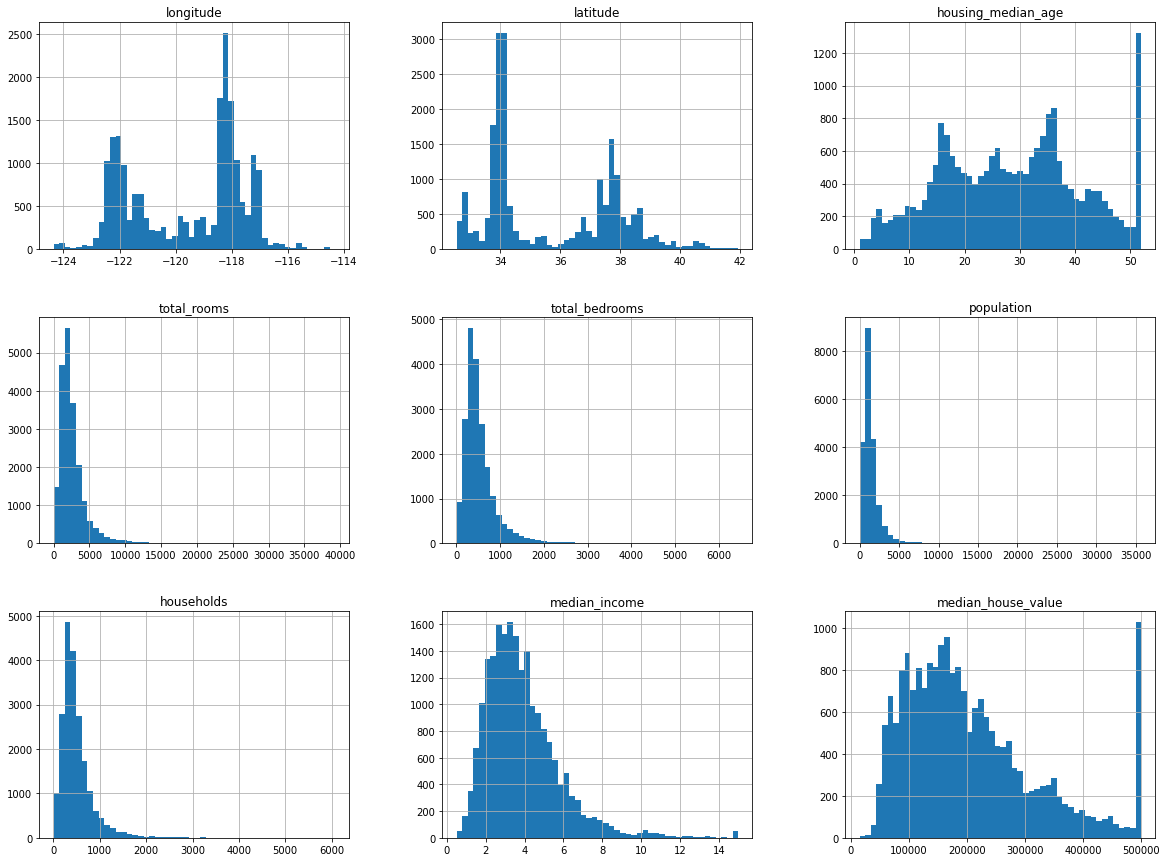

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

housingDf.hist(bins=50, figsize=(20,15))
plt.show()

A few things to notice in the histograms:
1. First, the **median income** attribute does not look like it is expressed in US dollars (USD). The data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about USD 30,000). 
2. The **housing median age** and the **median house value** were also capped. The latter may be a serious problem since it is the target attribute ("labels"). The Machine Learning algorithms may learn that prices never go beyond that limit. You need to check if this is a problem or not. If you're told that a precise prediction is needed even beyond USD 500,000, then there are two options:  
  a. Collect proper labels for the districts whose labels were capped.  
  b. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond
USD 500,000).  
3. These attributes have very **different scales**.  
4. Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

###Creating a Test Set

In [39]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housingDf, test_size=0.2, random_state=42) # 42 --> Answer to the Ultimate Question of Life, the Universe, and Everything  
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


The **median income** is assumed to be a very important attribute to predict median housing prices. We may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.  
Since the **median income is a continuous numerical attribute**, we first need to **create an *income category* attribute**.  
The median income histogram: most median income values are clustered around 1.5 to 6 (i.e., USD 15,000 – 60,000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. The following code uses the `pd.cut()` function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than USD 15,000), category 2 from
1.5 to 3, and so on

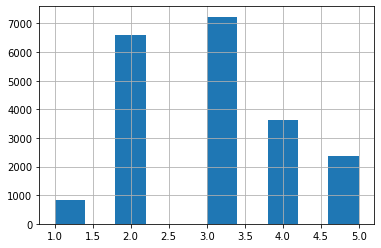

In [40]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

housingDf["income_cat"] = pd.cut(housingDf["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
housingDf["income_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housingDf, housingDf["income_cat"]):
  strat_train_set = housingDf.loc[train_index]
  strat_test_set = housingDf.loc[test_index]

#stratTrainSet["income_cat"].value_counts()


In [41]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now we can remove the Income_cat column, because we have used it to split the train and test sets with the strats of these categories.

In [42]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

##Discover and Visualize the Data to Gain Insights

In [43]:
housing = strat_train_set.copy()

###Visualizing Geographical Data

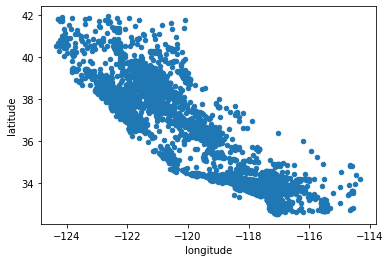

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude")

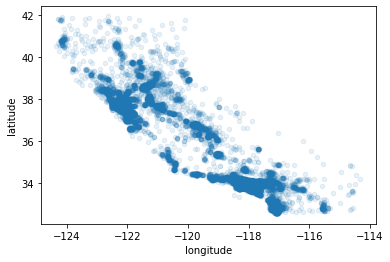

In [45]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # Alpha option makes it easier to see the density

Now, time to see the prices.  
* The radius of each circle represents the district’s population (option `s`)  
* The color represents the price (option `c`).  
* Using a predefined color map (option `cmap`) called `jet`, which ranges from blue (low values) to red (high prices)

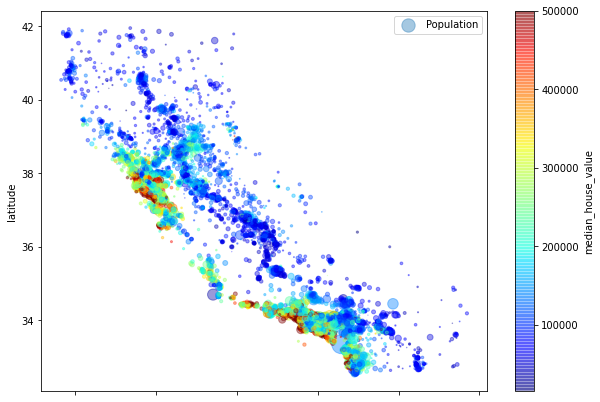

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

###Looking for Correlations  
Since the dataset is not too large, we can easily compute the **standard correlation coefficient** (a.k.a. **Pearson's r**) for every pair

In [47]:
corr_matrix = housing.corr() 
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


Or the correlation values of all the attributes with median house value.  

In [48]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

As we see the median_house_value is more correlated to median_income, total_rooms, and housing_median_age. Let's see them on a scatter matrix.  
Check Wikipedia for Standard Correlation Coefficient of Various Datasets on https://en.wikipedia.org/wiki/Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6013960c50>,
      dtype=object)

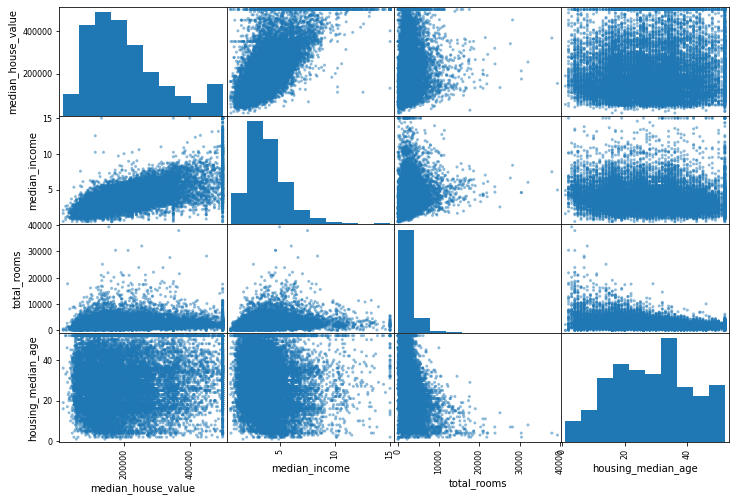

In [49]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))

The most promising attribute to predict the median house value looks like the median income.  
Focusing on the correlation scatterplot

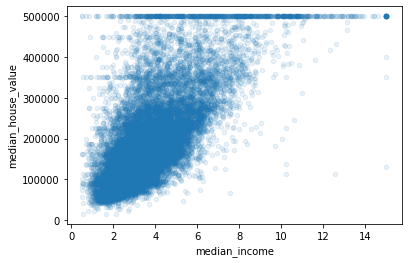

In [50]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

From the above plot:  
* The correlation is indeed very strong (notice the upward trend, and the points are not too dispersed)  
* The price cap is clearly visible as a horizontal line at USD 500,000. But this
plot reveals other less obvious straight lines: a horizontal line around USD 450,000, another around USD 350,000, perhaps one around USD 280,000, and a few more below that.  

We may want to try removing the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

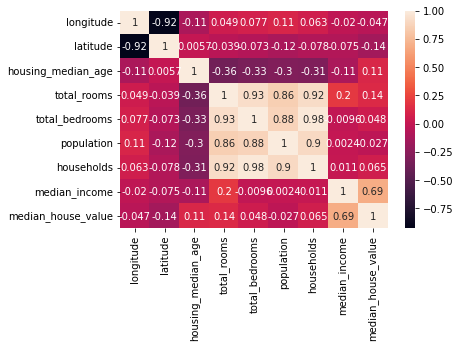

In [51]:
import seaborn as sn

sn.heatmap(corr_matrix, annot=True)
plt.show()

##Preparing Data for Machine Learning Algorithms


In [52]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

###Data Cleaning  

`total_bedrooms` attribute has some missing values. 3 options to fix it:
1. Getting rid of the corresponding districts
2. Getting rid of the whole attribute
3. Set the values to some value (zero, the mean, the median, etc.)


In [53]:
#Option 1
#housing.dropna(subset=["total_bedrooms"])

#Option 2
#housing.drop("total_bedrooms", axis=1)

#Option 3
median = housing["total_bedrooms"].median() # We need this value later since we will replace the missing values with this median in case the training set has missing values 
housing["total_bedrooms"].fillna(median, inplace=True)

Scikit-Learn has a handy class to take care of the missing values: `SimpleImputer`

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

'''
Median can be computed on the numerical attributes, therefore we need a 
copy of the data without the text attributes (e.g. ocean_proximity)
'''
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
# The imputer has simply computed the median of each attribute and stored the result
# in its statistics_ instance variable
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [55]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

The imputer is trained. Now we can use to replace the missing values with medians in the columns

In [56]:
X = imputer.transform(housing_num)

#Converting the NumPy array X to a Pandas Dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)


###Handling Text and Categorical Attributes
In the Housing dataset, there is one text attribute: `ocean_proximity`
Let's check the values

In [57]:
housing_cat = housing[["ocean_proximity"]] # If we don't use double brackets, then it returns a series. We want to have a dataframe
print(type(housing_cat))
housing_cat.head(10)

<class 'pandas.core.frame.DataFrame'>


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Checking the values, we see that these are predefined categories (not random text).  
Most ML algorithms require numerical data for the categorical information. We will use OrdinalEncoder class of Scikit-Learn to convert the categories to numerical values

In [58]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(housing_cat)
ordinal_encoder.categories_

# Instead of the last two lines above, we could have used the below 2 lines.
#housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#housing_cat_encoded[:10]

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
housing_cat_encoded = ordinal_encoder.transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).  
To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. This is called **one-hot encoding**,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [62]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

###Custom Transformers
Sometimes we may need to write our own transformers for customized tasks (e.g., cleanup operations, combining specific attributes).  
We want that our transformer work seamlessly with Scikit-Learn functionalities (e.g., pipelines). Therefore, we need to create a class and implement 3 methods: `fit()` (returning self), `transform()`, and `fit_transform()`  

The `fit_transform()` comes for free if we use `TransformerMixin` as a base class.  

If we add `BaseEstimator` as a base class (and avoid *args and **kargs in your constructor), you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

In [63]:
housingDf.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

###Feature Scaling
With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.  
There are two common ways to get all attributes to have the same scale: `min-max
scaling` and `standardization`.  

####Min-Max Scaling ("Normalization")
Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min.   Scikit-Learn provides a transformer called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that lets you change the range if, for some reason, you don’t want 0–1
####Standardization
First it subtracts the mean value (so standardized values
always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.  
Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1).  

Standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected.  
Scikit-Learn provides a transformer called `StandardScaler` for standardization.

###Transformation Pipelines
Multiple data transformation steps that need to be executed in a given order. Scikit-Learn provides a `Pipeline` class to build such sequences of transformations.  
The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a `fit_transform()` method). The names can be anything you like (as long as they are unique and don’t contain double underscores, __);


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                         ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

So far, the [categorical] text columns and the numerical columns were handled separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.  

In version 0.20, Scikit-Learn introduced the `ColumnTransformer` to handle all types of column transformations in a pipeline.  

Applying all the transformations to the housing data:

In [66]:
print("Type of housing_num: " + str(type(housing_num)))
print("Column names of housing_num: " + str(list(housing_num)))

Type of housing_num: <class 'pandas.core.frame.DataFrame'>
Column names of housing_num: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [67]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
# The constructor of ColumnTransformer requires a list of tuples, where each tuple 
# contains a name, a transformer, and a list of names (or indices) of columns that the transformer should be applied
full_pipeline = ColumnTransformer([            
                                   ("num", num_pipeline, num_attribs),    # Numerical columns processed by num_pipeline
                                                                          # -> (Imputer to clean + AttributeAdder to generate new attributes + StandardScaler to standardize)
                                   ("cat", OneHotEncoder(), cat_attribs), # Categorical column(s) processed by OneHotEncoder()
                                   ])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[:3]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]])

##Select and Train a Model  
So far, the data has been cleaned up, it is split into training and testing sets. Now, we will focus on selecting and training a Machine Learning model.

###Training and Evaluating on the Training Set  

####Training a **Linear Regression** model

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Predicting the housing values using the first 5 (or random) data of the training set. We need to pass through the same transformations before predicting. Fortunately, we have a full_pipeline that can do the transformations.

In [69]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [70]:
#Checking with the actual values
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Calculating the regression model's **RMSE (Root Mean Square Error)** on the whole training set. We will use Scikit-Learn's `mean_squared_error()` function. We need to take the `sqrt()` of this value, since it will calculate the mean squared error.

In [71]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)           # Now, we're using the whole training set to calculate housing predictions 
lin_mse = mean_squared_error(housing_labels, housing_predictions) # Calculating the RMSE between the actual label values with the predicted values
lin_rmse = np.sqrt(lin_mse)
lin_rmse                                                          

68627.87390018745

Not a very good result. Because, the median_housing_value range is $120,000 - $265,000 and the **prediction error** is around $68,627. A big error value for the range.  
The model is underfitting!

####Training a **Decision Tree Regressor** model

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

Training is completed. Let's see the performance (using RMSE) of the trained model

In [73]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

No error!  
The model is overfitting!

###Better Evaluation Using Cross-Validation
We can use a K-fold Cross Validation technique. In this technique the training set is split into multiple (i.e. *k*) smaller subsets ("folds"). The model is trained *k* times (using a different fold as an evaluation set and using the other *k-1* folds as a training set). This will produce an array of *k* evaluation scores.  
The following example uses k=10 folds.

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # Since the scoring is negative mean squared error, we need to use -scores to have a positive number in sqrt()

In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [73051.30930852 70570.22836521 68377.42386054 71285.87928891
 69294.5551208  77705.98663231 72153.56956952 73175.32481901
 68822.39666988 70437.2587349 ]
Mean: 71487.3932369608
Standard deviation: 2607.237584140963


Note that the Decision Tree Regressor is not performing better than the Linear Regression.

Computing the same scores for the Linear Regression model.

In [76]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180644


Slightly better than Decision Tree Regressor.

###Training a **Random Forest Regressor** model  
Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further.

In [77]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5) # Selecting a high k value will result in much longer training time. k=5 -> 60 sec
forest_rmse = np.sqrt(-scores) # Since the scoring is negative mean squared error, we need to use -scores to have a positive number in sqrt()
forest_rmse

array([50173.94466055, 49901.924741  , 49906.11913986, 51772.01664931,
       51925.25160609])

In [78]:
display_scores(forest_rmse)

Scores: [50173.94466055 49901.924741   49906.11913986 51772.01664931
 51925.25160609]
Mean: 50735.851359361644
Standard deviation: 915.198312284972


##Fine Tuning The Model  
How to compare the models, or how to know that the used ML model is performing better than the other ones.

###Grid Search  
One way of comparing the models is to manually change the hyperparameters and then compare the scores.  
Another way is to use Scikit-Learn's `GridSearchCV` to run the models with multiple parameters and returns the best parameter combination.  

In [79]:
from sklearn.model_selection import GridSearchCV

# This below evaluates 3*4 combinations for the first dictionnary, and 2*3 for the second
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
              ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
#Best Parameters
grid_search.best_params_
# The above will return {'max_features': 8, 'n_estimators': 30}
# Since the best parameters found are the max values it may be possible that a higher
# set of values (e.g., n_estimators: 30+ or max_features: 8+ (if any)) can be a better combination

{'max_features': 6, 'n_estimators': 30}

In [81]:
#Best Estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

We can display the evaluation scores per combination. 

In [82]:
cvres = grid_search.cv_results_
#print(cvres)
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63108.25195767205 {'max_features': 2, 'n_estimators': 3}
55080.041671603314 {'max_features': 2, 'n_estimators': 10}
53005.24657892573 {'max_features': 2, 'n_estimators': 30}
59566.71154759924 {'max_features': 4, 'n_estimators': 3}
52603.367562629 {'max_features': 4, 'n_estimators': 10}
50506.03369643818 {'max_features': 4, 'n_estimators': 30}
59680.17005673568 {'max_features': 6, 'n_estimators': 3}
51742.12587229529 {'max_features': 6, 'n_estimators': 10}
49965.55724404159 {'max_features': 6, 'n_estimators': 30}
59782.09447979758 {'max_features': 8, 'n_estimators': 3}
51986.96708481096 {'max_features': 8, 'n_estimators': 10}
50106.555660033366 {'max_features': 8, 'n_estimators': 30}
63607.48716332253 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54356.04151977041 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60138.32755785861 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52336.466187370956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

###Randomized Search  
The grid search approach is suitablefor exploring a small number of combinations, (e.g. in the example above we discovered 18 combinations). However, when the hyperparameter combination number is large, then using `RandomizedSearchCV` may be a better approach.  
The usage is very similar to `GridSearchCV`, but instead of testing all combinations this search tries random combinations.  
This method has 2 benefits:


1.   If the number of iterations is set to 1,000 then this method explores 1,000 different values of the hyperparameter
2.   Setting the number of iterations can be useful to setup a budget limit for this search (public clouds charge you in terms of CPU time you have used)



###Ensemble Methods  
Another method of fine tuning the model is using combinations of different models. The group of methods (called **ensemble**) usually performs better than the individual methods.

###Analysing the Best Models and Their Errors  
In some cases while analysing the models we will be able to get some insights on the problem. E.g., RandomForestRegressor can provide a scoring on the relative importance of each feature.

In [83]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances 

array([7.40090800e-02, 6.71429043e-02, 4.29083133e-02, 1.78620966e-02,
       1.64042989e-02, 1.74897087e-02, 1.59588000e-02, 2.99144734e-01,
       8.04036995e-02, 1.10206684e-01, 7.15086241e-02, 9.53898937e-03,
       1.70660949e-01, 7.79589690e-05, 2.43934790e-03, 4.24381081e-03])

Displaying the importance scores next to the attribute name can be more descriptive 😀

In [84]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.299144734425222, 'median_income'),
 (0.1706609493353121, 'INLAND'),
 (0.11020668372774817, 'pop_per_hhold'),
 (0.0804036995435671, 'rooms_per_hhold'),
 (0.07400907996629522, 'longitude'),
 (0.07150862413711788, 'bedrooms_per_room'),
 (0.06714290426724841, 'latitude'),
 (0.04290831331054026, 'housing_median_age'),
 (0.017862096623790676, 'total_rooms'),
 (0.01748970872354297, 'population'),
 (0.016404298927889405, 'total_bedrooms'),
 (0.015958799965027963, 'households'),
 (0.009538989371130636, '<1H OCEAN'),
 (0.00424381081007418, 'NEAR OCEAN'),
 (0.0024393478964884418, 'NEAR BAY'),
 (7.795896900468452e-05, 'ISLAND')]

Most of the Ocean Proximity categories are not useful (only "INLAND" looks like impacting the house price)  
Based on the above scores some of the attributes may be dropped

###Evaluating Our System on the Test Set  
Now, we have a model where we think that it is working on the data set (actually on the training portion of the entire set, that is usually 80%).  
We need to apply our trained model on the test set.  
All we need to do is:


1.   Get the best method
2.   Split the labels (*y*) and the data features(*X*) of the Test Set
3.   Apply the full_pipeline to the test data features
4.   Make predictions using test data features
5.   Compare with test data labels by calculating RMSE



In [85]:
# Get the best performing method of the Grid Search 
final_model = grid_search.best_estimator_

# Split the data features and the labels of the test set. Remember we are trying to estimate median_house_value
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Apply the full_pipeline to the X_test
X_test_prepared = full_pipeline.transform(X_test)

# Make predictions using test data features that are passed from the pipeline
final_predictions = final_model.predict(X_test_prepared)

# Calculate the RMSE between the predictions and y_test labels
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,950.9
final_rmse

47991.106572534474